In [27]:
# Importing Required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score

In [28]:
# Read dataset
df = pd.read_csv(r"/content/happydata.csv")
pd.set_option('display.max_column',25)
df

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0
...,...,...,...,...,...,...,...
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
140,5,3,3,4,4,5,1
141,4,3,3,4,4,5,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [30]:
df.isnull().sum()

,0
infoavail,0
housecost,0
schoolquality,0
policetrust,0
streetquality,0
ëvents,0
happy,0


In [31]:
df.duplicated().sum()

18

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.rename(columns={'ëvents':'events'}, inplace=True)

### EDA

In [34]:
df

,infoavail,housecost,schoolquality,policetrust,streetquality,events,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
5,5,5,3,5,5,5,1
...,...,...,...,...,...,...,...
137,5,2,3,4,4,3,1
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
141,4,3,3,4,4,5,0


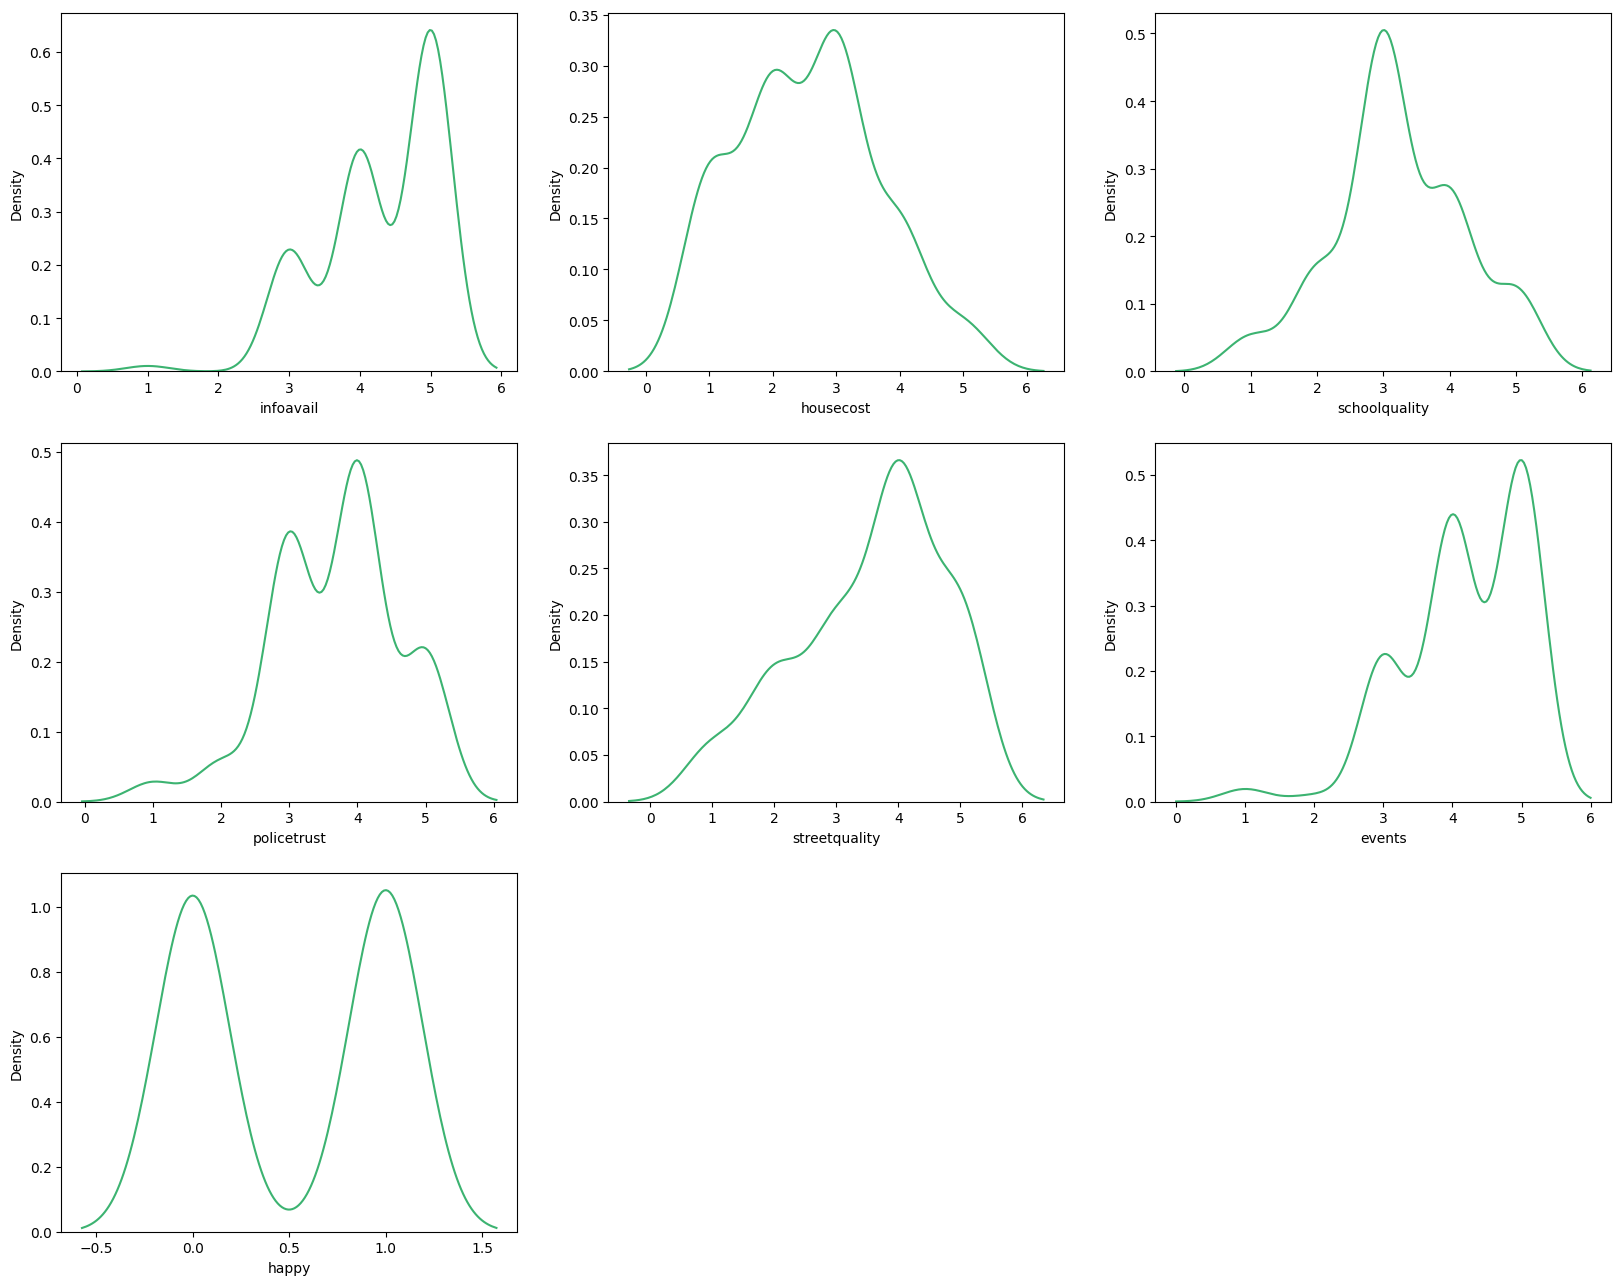

In [35]:


fig = plt.figure (figsize = [20 ,27])
for i in enumerate (df):
    plt.subplot(5,3,i[0]+1)
    sns.kdeplot(x = i[1],data = df , color='#3CB371')

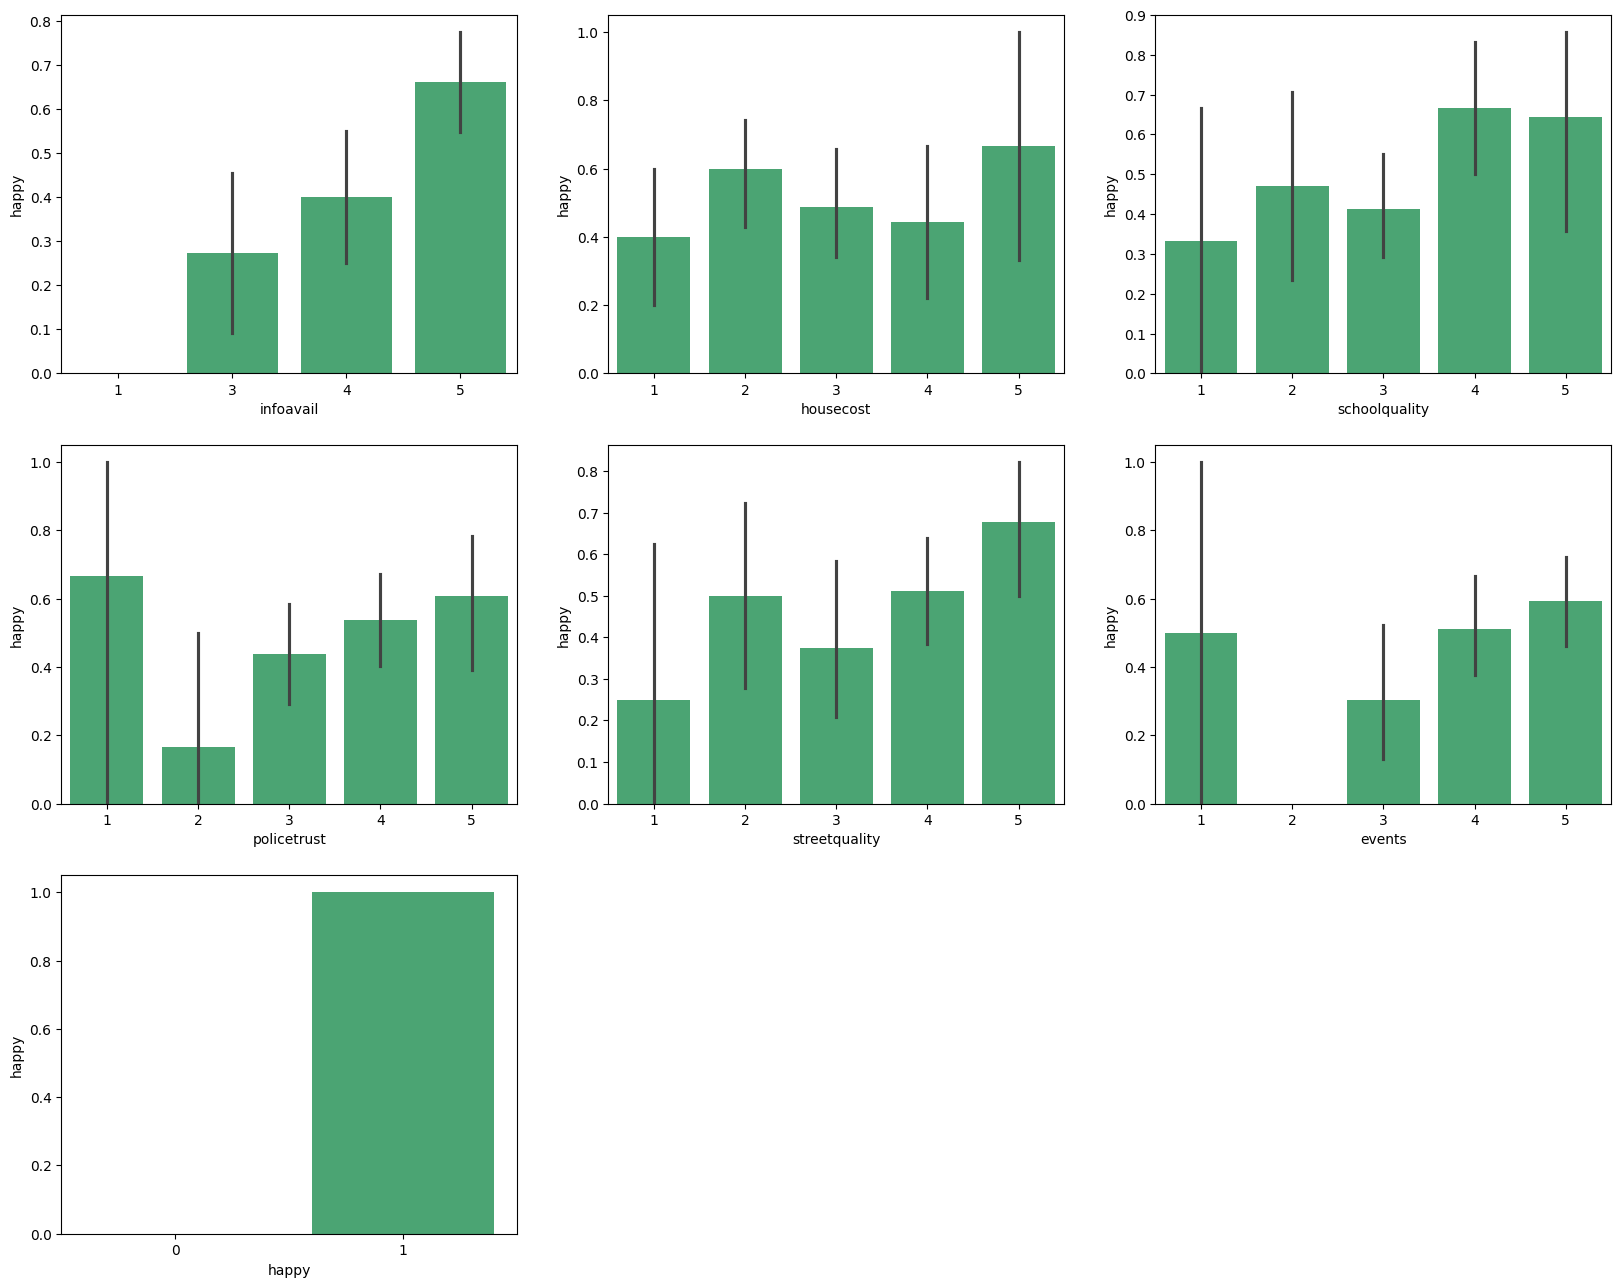

In [36]:


fig = plt.figure (figsize = [20 ,27])
for i in enumerate (df):
    plt.subplot(5,3,i[0]+1)
    sns.barplot(x = i[1],y='happy',data = df , color='#3CB371')

<ipython-input-37-f2783bfb83d3>:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.barplot(x = i[1],y='happy',data = df ,hue='streetquality', color='blue')
<ipython-input-37-f2783bfb83d3>:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.barplot(x = i[1],y='happy',data = df ,hue='streetquality', color='blue')
<ipython-input-37-f2783bfb83d3>:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.barplot(x = i[1],y='happy',data = df ,hue='streetquality', color='blue')
<ipython-input-37-f2783bfb83d3>:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.barplot(x = i

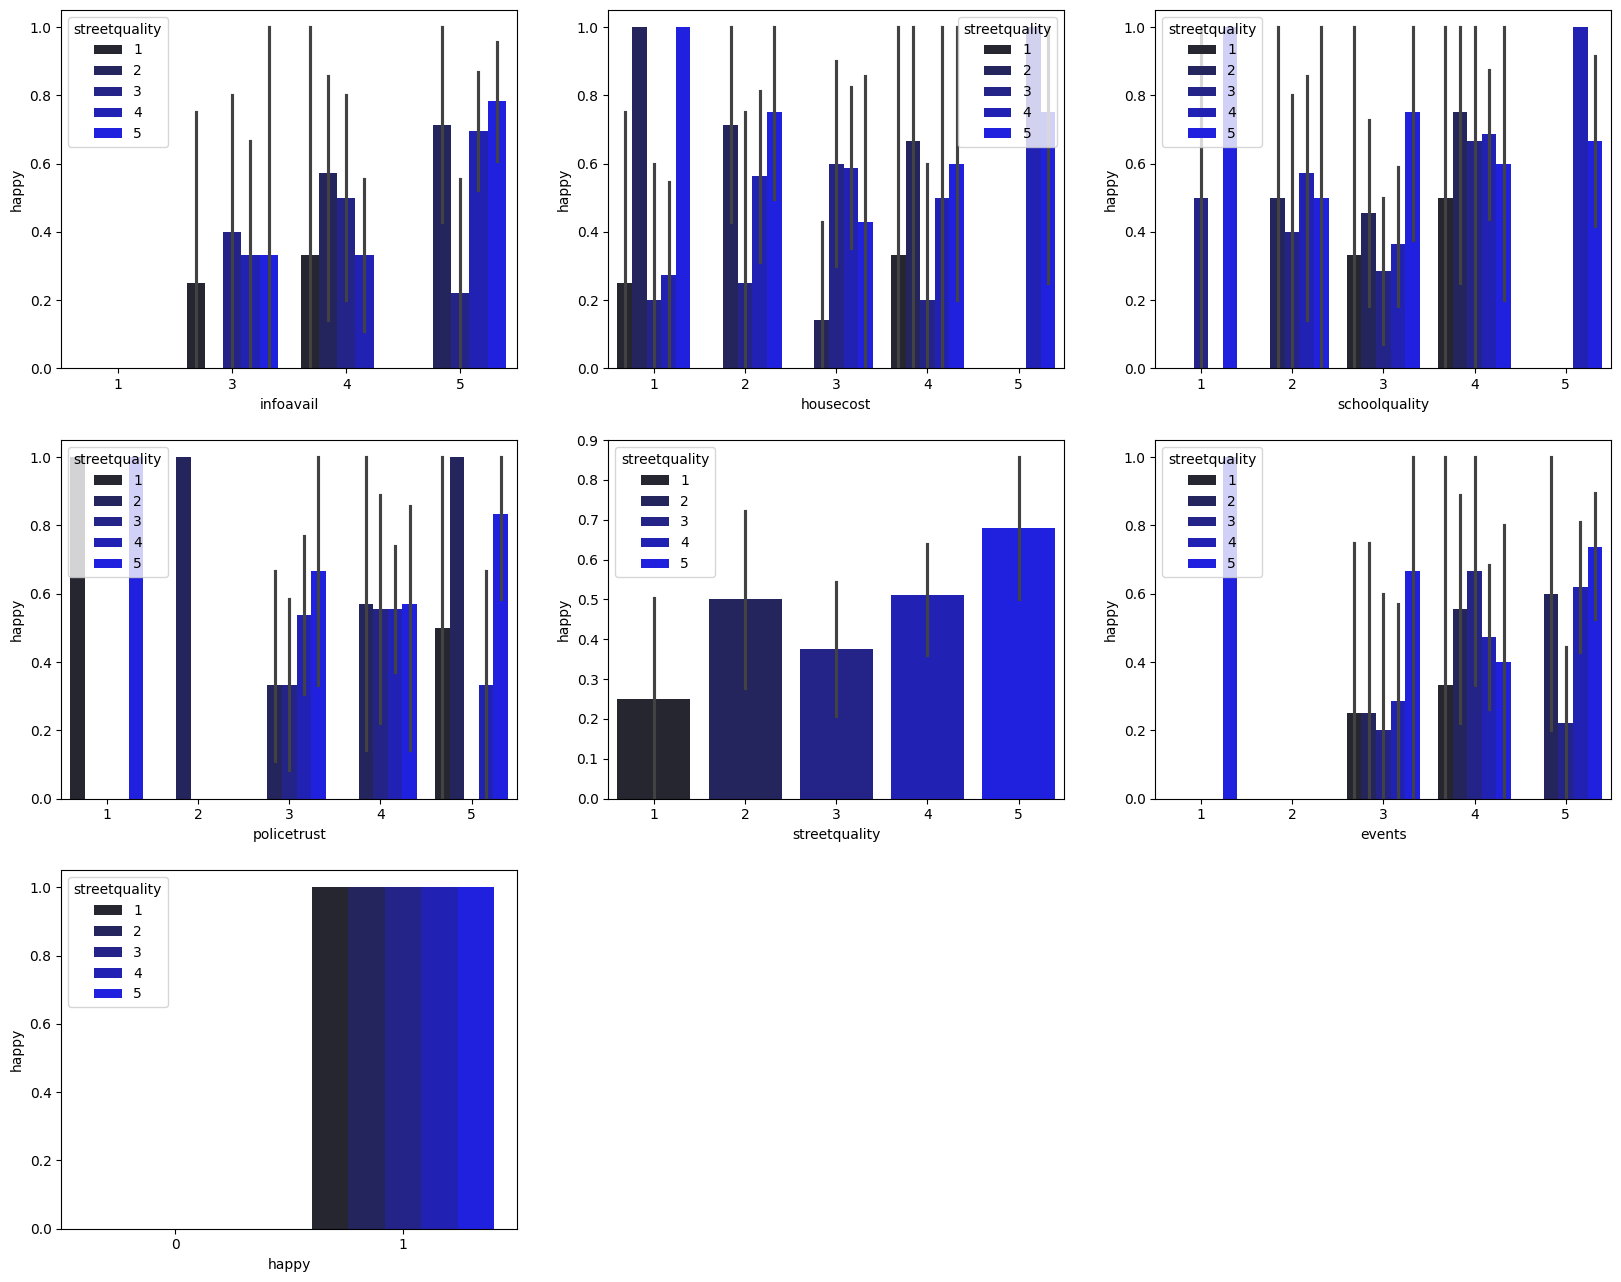

In [37]:


fig = plt.figure (figsize = [20 ,27])
for i in enumerate (df):
    plt.subplot(5,3,i[0]+1)
    sns.barplot(x = i[1],y='happy',data = df ,hue='streetquality', color='blue')

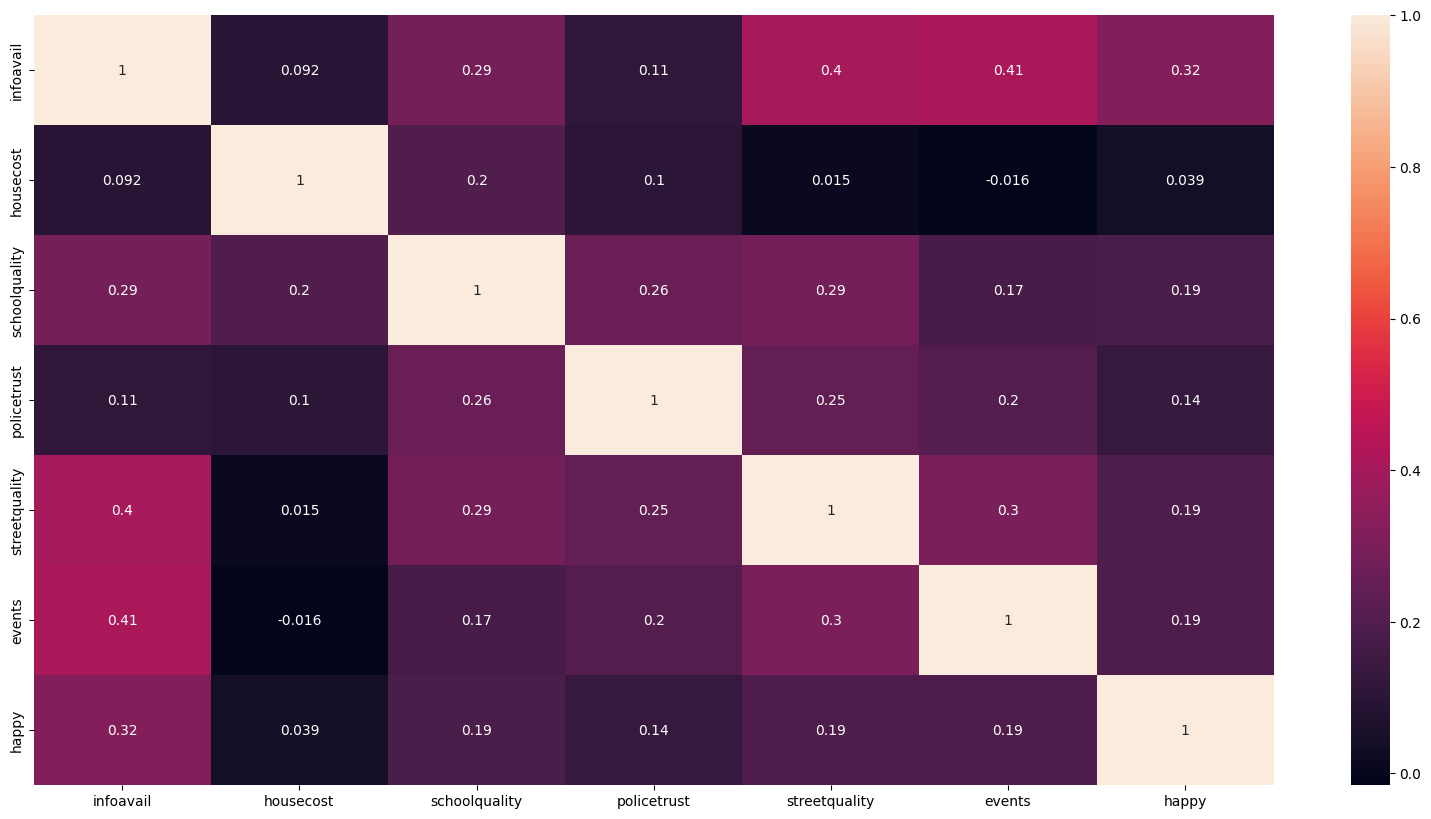

In [38]:
# Checking for Correlation

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [39]:
high_corr_colms=[]
for i in df:
    corr = df['happy'].corr(df[i])
    if corr > 0.1 or corr <-0.1:
        high_corr_colms.append(i)
high_corr_colms

['infoavail',
 'schoolquality',
 'policetrust',
 'streetquality',
 'events',
 'happy']

In [40]:
df = df[high_corr_colms]

In [41]:
df

,infoavail,schoolquality,policetrust,streetquality,events,happy
0,3,3,4,2,4,0
1,3,3,5,4,3,0
2,5,3,3,3,5,1
3,5,3,3,3,5,0
5,5,3,5,5,5,1
...,...,...,...,...,...,...
137,5,3,4,4,3,1
138,5,3,1,3,5,0
139,5,3,4,2,5,1
141,4,3,4,4,5,0


In [42]:
selected_features=['infoavail','streetquality','schoolquality','happy']
df = df[selected_features]


In [43]:
df

,infoavail,streetquality,schoolquality,happy
0,3,2,3,0
1,3,4,3,0
2,5,3,3,1
3,5,3,3,0
5,5,5,3,1
...,...,...,...,...
137,5,4,3,1
138,5,3,3,0
139,5,2,3,1
141,4,4,3,0


In [44]:
x = df.drop('happy',axis=1)
y = df['happy']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [46]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]

}
lg = LogisticRegression()

rcv = RandomizedSearchCV(lg,params,cv=5)
rcv.fit(x_train,y_train)
rcv.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 300, 'C': 0.1}

In [47]:
rcv.best_score_

0.6199999999999999

In [48]:
gcv = GridSearchCV(lg,params,cv=5)
gcv.fit(x_train,y_train)
gcv.best_params_
gcv.fit(x_train,y_train)
gcv.best_params_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [49]:
gcv.best_score_

0.6199999999999999

In [50]:
# Logistic
lg = LogisticRegression( solver='newton-cg',
    penalty='l2',
    max_iter=100,
    C=0.1)
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
lg.score(x_test,y_test)

0.64

<Axes: >

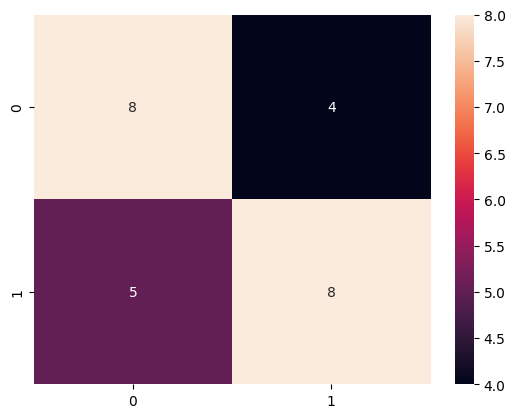

In [51]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".3g")